In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:

#file_path = 'diabetes.csv'
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [4]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [5]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


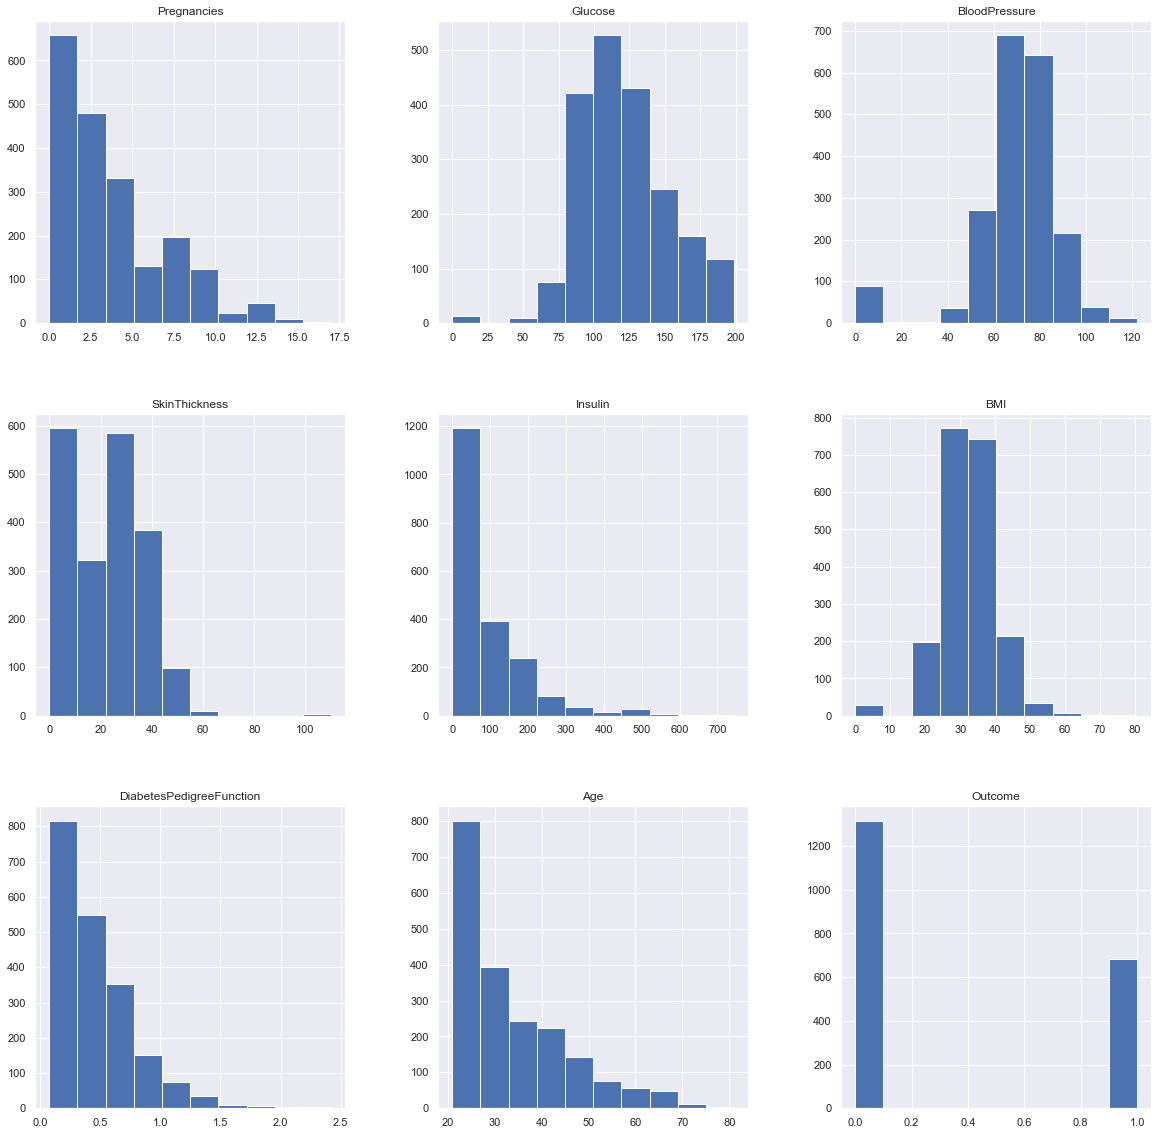

In [6]:
p = diabetes_df.hist(figsize = (20,20))

In [7]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

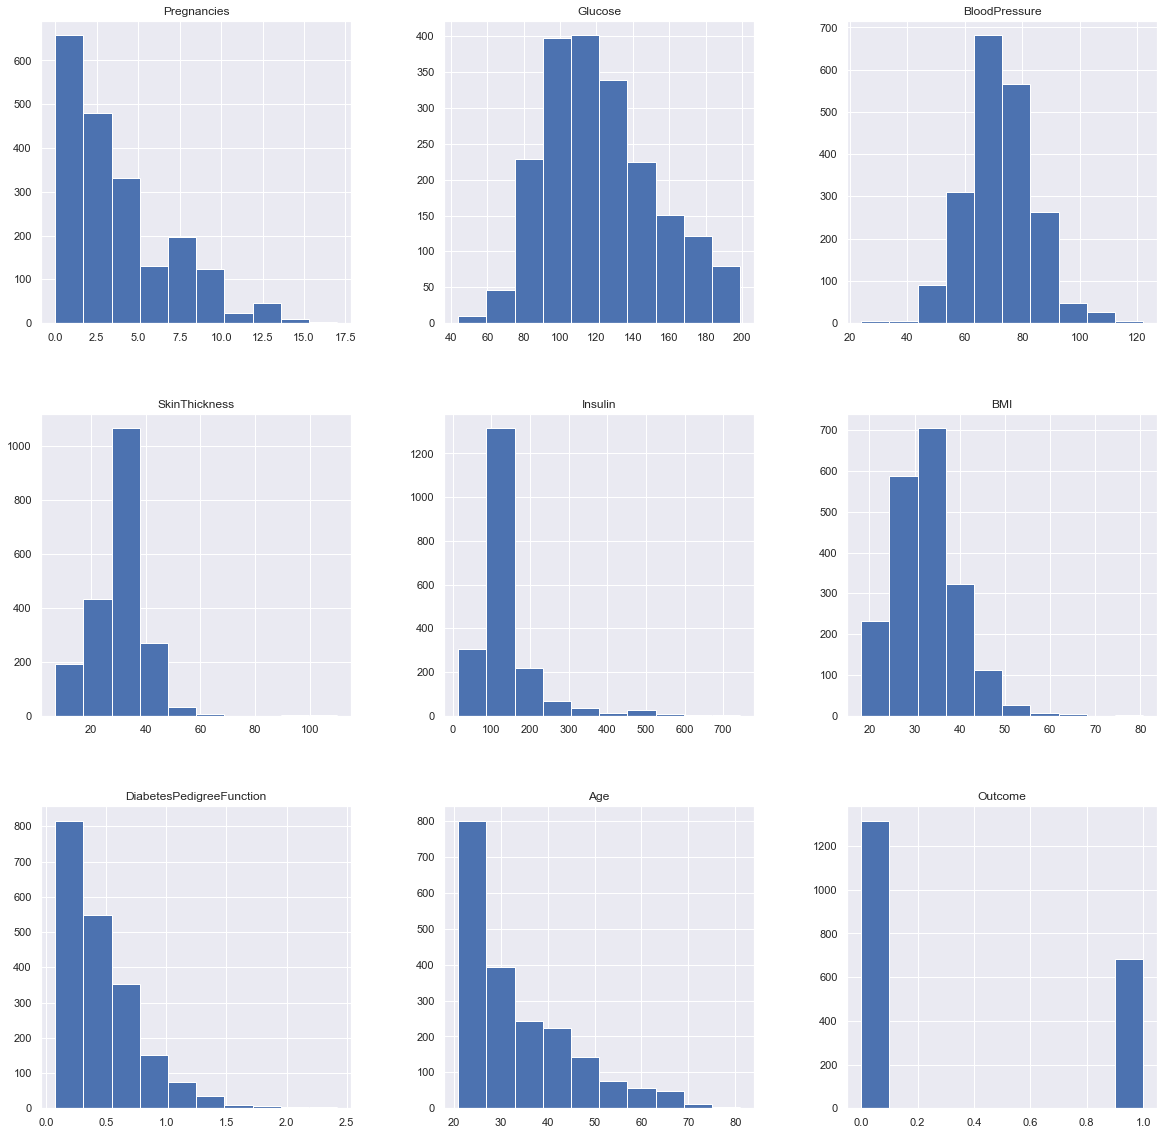

In [8]:
p = diabetes_df_copy.hist(figsize = (20,20))

0    1316
1     684
Name: Outcome, dtype: int64


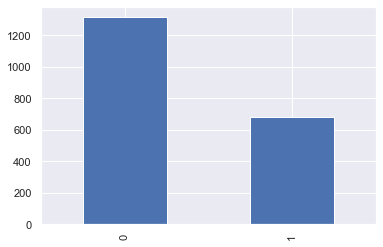

In [9]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

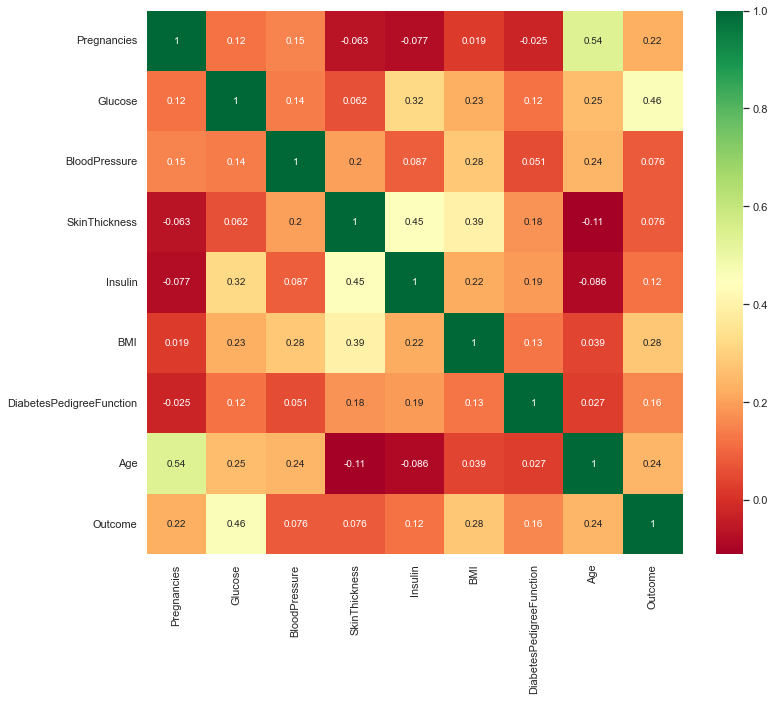

In [10]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [129]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=[ 'Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524960,-0.870852,0.631010,-0.177601,0.132630,-1.063246,1.180424
1,-1.120495,-1.244054,0.803273,0.192542,-0.189864,0.772550,-0.735551,-0.856326
2,-1.120495,0.754277,0.000000,-0.026692,-0.177601,1.607229,0.491759,-0.177409
3,-1.120495,0.426682,-0.368614,1.398329,1.343080,1.342914,-0.327478,-0.771462
4,-0.817945,0.557720,-0.870852,1.288712,4.163696,1.120333,0.201161,-1.026055


In [130]:
y = diabetes_df_copy.Outcome
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [177]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [179]:
print(y_train)

1081    0
1911    0
1527    1
705     0
1671    0
       ..
1603    0
502     1
537     0
1220    0
175     1
Name: Outcome, Length: 1340, dtype: int64


# **Random Forest**

In [180]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [181]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [182]:
#Accuracy
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)*100))

Accuracy_Score = 96.66666666666667


Classification report and confusion matrix of random forest model

In [183]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[424   9]
 [ 13 214]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       433
           1       0.96      0.94      0.95       227

    accuracy                           0.97       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.97      0.97      0.97       660



# **Decision Tree**
Building the model using DecisionTree

In [101]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
d_train = dtree.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_train)))

Accuracy_Score = 1.0


In [103]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score = 95.0


In [104]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[419  14]
 [ 19 208]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       433
           1       0.94      0.92      0.93       227

    accuracy                           0.95       660
   macro avg       0.95      0.94      0.94       660
weighted avg       0.95      0.95      0.95       660



# **Support Vector Machine (SVM)**

In [25]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear",random_state=0)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
from sklearn import metrics
svc_pred = svc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)*100))

Accuracy Score = 78.63636363636364


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[386  47]
 [ 94 133]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       433
           1       0.74      0.59      0.65       227

    accuracy                           0.79       660
   macro avg       0.77      0.74      0.75       660
weighted avg       0.78      0.79      0.78       660



# **KNN - K Nearest Neighbor**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
#n_neighbors is 25 bcoz for x_train we got 614 which is near to 25^2
#metric means on what factor choosing so as its KNN so our metric is minkowski i.e., distance
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [29]:
#Predicting the data
knn_y_pred = knn.predict(X_test)

In [30]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, knn_y_pred)*100))

Accuracy Score = 78.03030303030303


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test,knn_y_pred))

[[380  53]
 [ 92 135]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       433
           1       0.72      0.59      0.65       227

    accuracy                           0.78       660
   macro avg       0.76      0.74      0.75       660
weighted avg       0.78      0.78      0.77       660



# **Naive Bayes**

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [33]:
nb_y_pred =nb_classifier.predict(X_test)

In [34]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, nb_y_pred)*100))

Accuracy Score = 77.57575757575758


# **Logistic Regression**

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
diabetesCheck = LogisticRegression(random_state=0)
diabetesCheck.fit(X_train, y_train)
d_log = diabetesCheck.predict(X_train)


In [37]:

# from sklearn import metrics

# print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_log)))

# accuracy = metrics.accuracy_score(y_train, d_log)
# print("accuracy = ", accuracy )

In [160]:
from sklearn import metrics
predictions = diabetesCheck.predict(X_test)
# print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_train)))
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score = 78.78787878787878


In [161]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[383  50]
 [ 90 137]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       433
           1       0.73      0.60      0.66       227

    accuracy                           0.79       660
   macro avg       0.77      0.74      0.75       660
weighted avg       0.78      0.79      0.78       660



In [162]:
feature_names = ["Pregnancies","Glucose",	"BloodPressure","SkinThickness"	,"Insulin",	"BMI","DiabetesPedigreeFunction","Age"]

[ 1.48676222e-01  3.51730067e-02 -1.20509213e-02 -1.63440871e-04
 -1.17226156e-03  6.57328745e-02  9.93526025e-01  6.62942190e-03]


Text(0.5, 0, 'Importance')

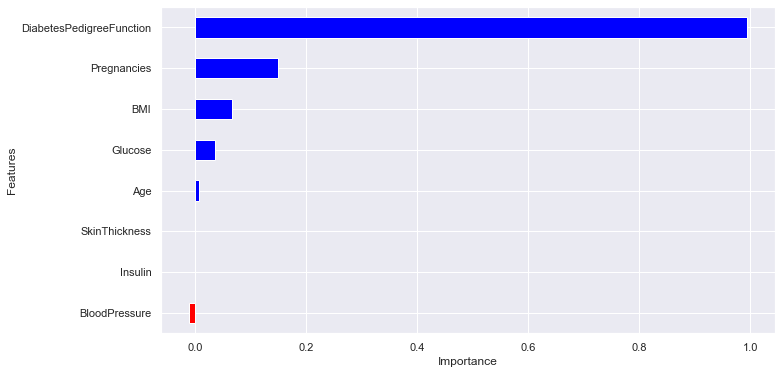

In [163]:
#Important feature for logistic regression prediction

coeff = diabetesCheck.coef_[0]
print(coeff)

labels = pd.DataFrame(feature_names, columns = ["feature"])
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [74]:
# feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
# feature_importance["importance"] = diabetesCheck.coef_[0]
# feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
# from sklearn.linear_model import LogisticRegression
# ax = feature_importance.plot.barh(x='feature', y='importance')
# plt.show()

<AxesSubplot:>

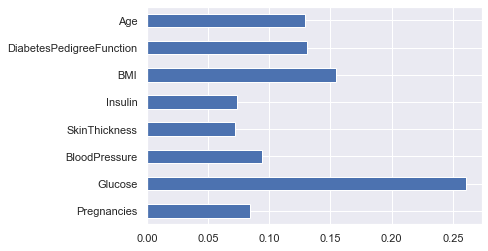

In [184]:
#Important feature for RFC prediction

(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [229]:
#import pickle

# Firstly we will be using the dump() function to save the model using pickle
#saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
#rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
#rfc_from_pickle.predict(X_test)


In [373]:

#Feature Scaling - To standardize the independent features present in the data in a fixed range.
#If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller
#values as the lower values, regardless of the unit of the values. 
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(X_train)
#x_test = sc.transform(X_test)

In [185]:
import pickle
pickle.dump(rfc, open('classifier.pkl', 'wb'))

In [186]:
pickle.dump(sc_X, open('sc.pkl', 'wb'))


In [187]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [188]:
rfc.predict([[0,145,	0	,0,	0	,44.2,	0.630,	31		]]) #2nd patient
#rfc.predict([[0,84,	82	,31,	125	,38.2,	0.233,	23		]]) #1st patient

array([1], dtype=int64)

In [172]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [190]:
x=rfc.predict([[2,81,	72,	15,	76,	30.1	,0.547,	25]])  # 1999 th patient
#x=rfc.predict([[0,129,	110,	46,	130,	67.1,	0.319,	26]])  # 1998 th patient
if(x>=1):
  print("Patient has diabetes")
else:
  print("No diabetes")

No diabetes
